In [2]:
import requests

url='https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=2'

page=requests.get(url)

print(page.text)


<html lang='ko'>
<head>
<title>네이버페이 증권</title>
<meta http-equiv='Content-Type' content='text/html; charset=euc-kr'>
<meta http-equiv="Content-Script-Type" content="text/javascript">
<meta http-equiv="Content-Style-Type" content="text/css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231205174942/css/finance.css">

<script language="javascript">document.domain="naver.com";</script>
<script type="text/javascript" src="https://ssl.pstatic.net/imgstock/static.pc/20231205174942/js/info/jindo.min.ns.1.5.3.euckr.js"></script>
<script type="text/javascript" src="https://ssl.pstatic.net/imgstock/static.pc/20231205174942/js/lcslog.js"></script>
</head>
<body>
<div class="section_exchange section_today">
	<h3 class="h_today"><span>일별 환율</span></h3>
	<table border="1" class="tbl_exchange today" summary="일별 환율 리스트">
	<caption>일별 환율</caption>
	<colgroup>
	<col width="78">
    <col width="78">
	<col width="73">
	<col width="76">
    <col width="76">
    

In [3]:
my_headers={'user-agent': 'Mozilla/5.0'}

page = requests.get(url, headers=my_headers)

print(page.text)

<html lang='ko'>
<head>
<title>네이버페이 증권</title>
<meta http-equiv='Content-Type' content='text/html; charset=euc-kr'>
<meta http-equiv="Content-Script-Type" content="text/javascript">
<meta http-equiv="Content-Style-Type" content="text/css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231205174942/css/finance.css">

<script language="javascript">document.domain="naver.com";</script>
<script type="text/javascript" src="https://ssl.pstatic.net/imgstock/static.pc/20231205174942/js/info/jindo.min.ns.1.5.3.euckr.js"></script>
<script type="text/javascript" src="https://ssl.pstatic.net/imgstock/static.pc/20231205174942/js/lcslog.js"></script>
</head>
<body>
<div class="section_exchange section_today">
	<h3 class="h_today"><span>일별 환율</span></h3>
	<table border="1" class="tbl_exchange today" summary="일별 환율 리스트">
	<caption>일별 환율</caption>
	<colgroup>
	<col width="78">
    <col width="78">
	<col width="73">
	<col width="76">
    <col width="76">
    

In [4]:
import pandas as pd
pages=pd.read_html(page.text)
type(pages)


list

In [5]:
len(pages)

1

In [6]:
pages[0]

날짜   매매기준율  전일대비      현찰              송금         T/C 사실때 외화수표 파실 때
           날짜   매매기준율  전일대비    사실 때    파실 때   보내실 때   받으실 때 T/C 사실때 외화수표 파실 때
0  2023.11.24  873.64  2.41  888.92  858.36  882.20  865.08     NaN    864.65
1  2023.11.23  871.23  2.12  886.47  855.99  879.76  862.70     NaN    862.27
2  2023.11.22  873.35  1.16  888.63  858.07  881.90  864.80     NaN    864.37
3  2023.11.21  874.51  2.94  889.81  859.21  883.08  865.94     NaN    865.51
4  2023.11.20  871.57  5.13  886.82  856.32  880.11  863.03     NaN    862.60
5  2023.11.17  866.44  8.06  881.60  851.28  874.93  857.95     NaN    857.52
6  2023.11.16  858.38  6.69  873.40  843.36  866.79  849.97     NaN    849.55
7  2023.11.15  865.07  5.42  880.20  849.94  873.54  856.60     NaN    856.17
8  2023.11.14  870.49  3.06  885.72  855.26  879.02  861.96     NaN    861.53
9  2023.11.13  873.55  2.13  888.83  858.27  882.11  864.99     NaN    864.56

In [7]:
all_tables=pd.DataFrame()

In [8]:
new_url='https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page='

for page_number in range(1,2): 
    full_url=new_url+str(page_number)
    print(full_url, "스크래핑...")
    page=requests.get(full_url,headers=my_headers)
    table=pd.read_html(page.text)[0]
    all_tables=pd.concat([all_tables,table])

https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=1 스크래핑...


In [9]:
all_tables

날짜   매매기준율   전일대비      현찰              송금         T/C 사실때 외화수표 파실 때
           날짜   매매기준율   전일대비    사실 때    파실 때   보내실 때   받으실 때 T/C 사실때 외화수표 파실 때
0  2023.12.08  910.44   0.44  926.37  894.51  919.36  901.52     NaN    901.07
1  2023.12.07  910.00  17.29  925.92  894.08  918.91  901.09     NaN    900.64
2  2023.12.06  892.71   1.33  908.33  877.09  901.45  883.97     NaN    883.53
3  2023.12.05  894.04   4.69  909.68  878.40  902.80  885.28     NaN    884.84
4  2023.12.04  889.35   4.86  904.91  873.79  898.06  880.64     NaN    880.20
5  2023.12.01  884.49   8.01  899.96  869.02  893.15  875.83     NaN    875.39
6  2023.11.30  876.48   1.44  891.81  861.15  885.06  867.90     NaN    867.47
7  2023.11.29  875.04   1.43  890.35  859.73  883.61  866.47     NaN    866.04
8  2023.11.28  873.61   0.71  888.89  858.33  882.17  865.05     NaN    864.62
9  2023.11.27  874.32   0.68  889.62  859.02  882.88  865.76     NaN    865.33

In [10]:
all_tables.dropna(how='all', inplace=True)
all_tables

날짜   매매기준율   전일대비      현찰              송금         T/C 사실때 외화수표 파실 때
           날짜   매매기준율   전일대비    사실 때    파실 때   보내실 때   받으실 때 T/C 사실때 외화수표 파실 때
0  2023.12.08  910.44   0.44  926.37  894.51  919.36  901.52     NaN    901.07
1  2023.12.07  910.00  17.29  925.92  894.08  918.91  901.09     NaN    900.64
2  2023.12.06  892.71   1.33  908.33  877.09  901.45  883.97     NaN    883.53
3  2023.12.05  894.04   4.69  909.68  878.40  902.80  885.28     NaN    884.84
4  2023.12.04  889.35   4.86  904.91  873.79  898.06  880.64     NaN    880.20
5  2023.12.01  884.49   8.01  899.96  869.02  893.15  875.83     NaN    875.39
6  2023.11.30  876.48   1.44  891.81  861.15  885.06  867.90     NaN    867.47
7  2023.11.29  875.04   1.43  890.35  859.73  883.61  866.47     NaN    866.04
8  2023.11.28  873.61   0.71  888.89  858.33  882.17  865.05     NaN    864.62
9  2023.11.27  874.32   0.68  889.62  859.02  882.88  865.76     NaN    865.33

In [11]:
all_tables.dropna(axis='columns', inplace=True)
all_tables

날짜   매매기준율   전일대비      현찰              송금         외화수표 파실 때
           날짜   매매기준율   전일대비    사실 때    파실 때   보내실 때   받으실 때 외화수표 파실 때
0  2023.12.08  910.44   0.44  926.37  894.51  919.36  901.52    901.07
1  2023.12.07  910.00  17.29  925.92  894.08  918.91  901.09    900.64
2  2023.12.06  892.71   1.33  908.33  877.09  901.45  883.97    883.53
3  2023.12.05  894.04   4.69  909.68  878.40  902.80  885.28    884.84
4  2023.12.04  889.35   4.86  904.91  873.79  898.06  880.64    880.20
5  2023.12.01  884.49   8.01  899.96  869.02  893.15  875.83    875.39
6  2023.11.30  876.48   1.44  891.81  861.15  885.06  867.90    867.47
7  2023.11.29  875.04   1.43  890.35  859.73  883.61  866.47    866.04
8  2023.11.28  873.61   0.71  888.89  858.33  882.17  865.05    864.62
9  2023.11.27  874.32   0.68  889.62  859.02  882.88  865.76    865.33

In [12]:
all_tables=pd.DataFrame()
for page_number in range(1,201):
    full_url=new_url+str(page_number)
    print(full_url, "스크래핑...")
    page=requests.get(full_url,headers=my_headers)
    table=pd.read_html(page.text)[0]
    all_tables=pd.concat([all_tables,table])

https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=1 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=2 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=3 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=4 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=5 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=6 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=7 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=8 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=9 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JP

https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=82 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=83 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=84 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=85 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=86 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=87 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=88 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=89 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=90 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketinde

https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=162 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=163 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=164 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=165 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=166 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=167 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=168 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=169 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=170 스크래핑...
https://finance.naver.com/marketindex/exchangeDailyQuote.naver?m

In [13]:
all_tables.dropna(axis='columns', inplace=True)
all_tables = all_tables.drop('현찰', axis=1)
all_tables = all_tables.drop('송금', axis=1)
all_tables

C:\Users\4suns\AppData\Local\Temp\ipykernel_32192\1041831287.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  all_tables = all_tables.drop('현찰', axis=1)
C:\Users\4suns\AppData\Local\Temp\ipykernel_32192\1041831287.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  all_tables = all_tables.drop('송금', axis=1)


,날짜,매매기준율,전일대비,외화수표 파실 때
,날짜,매매기준율,전일대비,외화수표 파실 때
0,2023.12.08,910.44,0.44,901.07
1,2023.12.07,910.00,17.29,900.64
2,2023.12.06,892.71,1.33,883.53
3,2023.12.05,894.04,4.69,884.84
4,2023.12.04,889.35,4.86,880.20
...,...,...,...,...
5,2015.11.11,938.85,1.11,929.18
6,2015.11.10,939.96,0.89,930.28
7,2015.11.09,939.07,2.01,929.40


In [14]:
all_tables.rename(columns={'날짜':'date',
                           '매매기준율':'trade_rate',
                           '외화수표 파실 때':'foreign_check'}
                 ,inplace=True)

all_tables


,date,trade_rate,전일대비,foreign_check
,date,trade_rate,전일대비,foreign_check
0,2023.12.08,910.44,0.44,901.07
1,2023.12.07,910.00,17.29,900.64
2,2023.12.06,892.71,1.33,883.53
3,2023.12.05,894.04,4.69,884.84
4,2023.12.04,889.35,4.86,880.20
...,...,...,...,...
5,2015.11.11,938.85,1.11,929.18
6,2015.11.10,939.96,0.89,930.28
7,2015.11.09,939.07,2.01,929.40


In [15]:
all_tables.drop(['전일대비'],axis=1,inplace=True)
all_tables

C:\Users\4suns\AppData\Local\Temp\ipykernel_32192\883867842.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  all_tables.drop(['전일대비'],axis=1,inplace=True)


,date,trade_rate,foreign_check
,date,trade_rate,foreign_check
0,2023.12.08,910.44,901.07
1,2023.12.07,910.00,900.64
2,2023.12.06,892.71,883.53
3,2023.12.05,894.04,884.84
4,2023.12.04,889.35,880.20
...,...,...,...
5,2015.11.11,938.85,929.18
6,2015.11.10,939.96,930.28
7,2015.11.09,939.07,929.40


<AxesSubplot: >

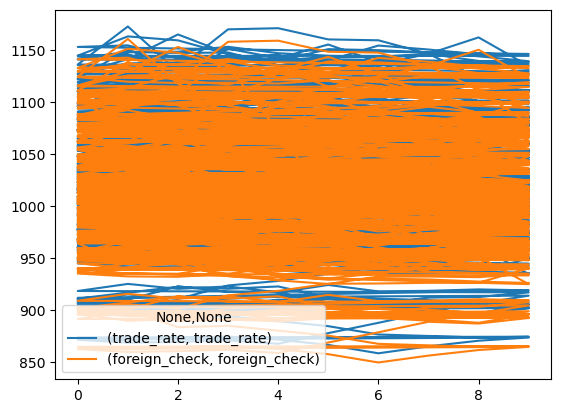

In [16]:
all_tables.plot.line()

In [17]:
all_tables

,date,trade_rate,foreign_check
,date,trade_rate,foreign_check
0,2023.12.08,910.44,901.07
1,2023.12.07,910.00,900.64
2,2023.12.06,892.71,883.53
3,2023.12.05,894.04,884.84
4,2023.12.04,889.35,880.20
...,...,...,...
5,2015.11.11,938.85,929.18
6,2015.11.10,939.96,930.28
7,2015.11.09,939.07,929.40


In [18]:
csv_filename = '환율데이터.csv'
all_tables.to_csv(csv_filename, index=False)

